<a href="https://colab.research.google.com/github/edu015u/IA-Y-REDES-NEURONALES-2025/blob/main/ACTIVIDADES/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AF7:Redes Neuronales Artificiales **
Integrantes:

Blas Eduardo Escobar Rodriguez 1903990 N5

Gael Guevara Puente 2049066 N5

Ana Camila Parra Aguilar 2052187 N5

Christopher Daniel Candelario López 2001039 N5

Jonathan Gonzalez Zuñiga 2108162 N5


**Explicación de la actividad **
El objetivo del notebook es entrenar a un modelo de Red Neuronal Prealimentada tipo feedforward.

Para lograr esta actividad, se usará el conjunto de datos "Keras".

Se llevará a cabo los siguientes pasos:

Carga de datos y librerias: importar el datasheet y sus características, ademas de importar las librerias necesarias.

Preprocesamiento:aqui se prepara la información para que el modela pueda procesarla, se normalizan los valores de las imagenes, se convierte la forma de imagenes en vectores y se hace uso de la funcion softmax.

Diseño de la red neuronal: se hace el número de capas ocultas, el número de neuronas por capa.

Entrenamiento: entrenamos a la red neuronal con los datos del entrenamiento, se ajusta para reducir el error de predicción.

Evaluación del modelo: se evalúa el desempeño del modelo con el conjunto de datos de prueba.

Predicciones: se eligen muestras del conjunto de datos de prueba para realizar predicciones.

1. Cargar librerias

In [1]:
#Importamos las librerías
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow versión:", tf.__version__)

TensorFlow versión: 2.19.0


2. Carga de datos

In [2]:
# Carga  del dataset de dígitos
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Exploramos los datos

In [3]:
print(f"Imágenes de entrenamiento: {x_train.shape}")
print(f"Imágenes de prueba: {x_test.shape}")

Imágenes de entrenamiento: (60000, 28, 28)
Imágenes de prueba: (10000, 28, 28)


4. Preprocesamiento de datos

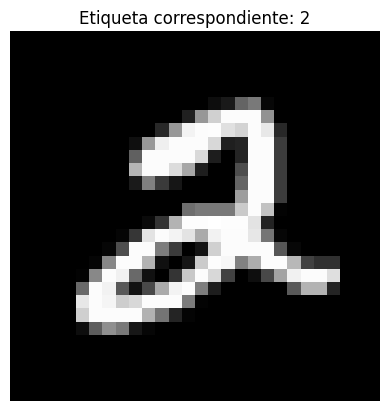

In [4]:
#Observamos un ejemplo del conjunto de datos
plt.figure()
plt.imshow(x_train[5], cmap="gray")
plt.title(f"Etiqueta correspondiente: {y_train[5]}")
plt.axis("off")
plt.show()

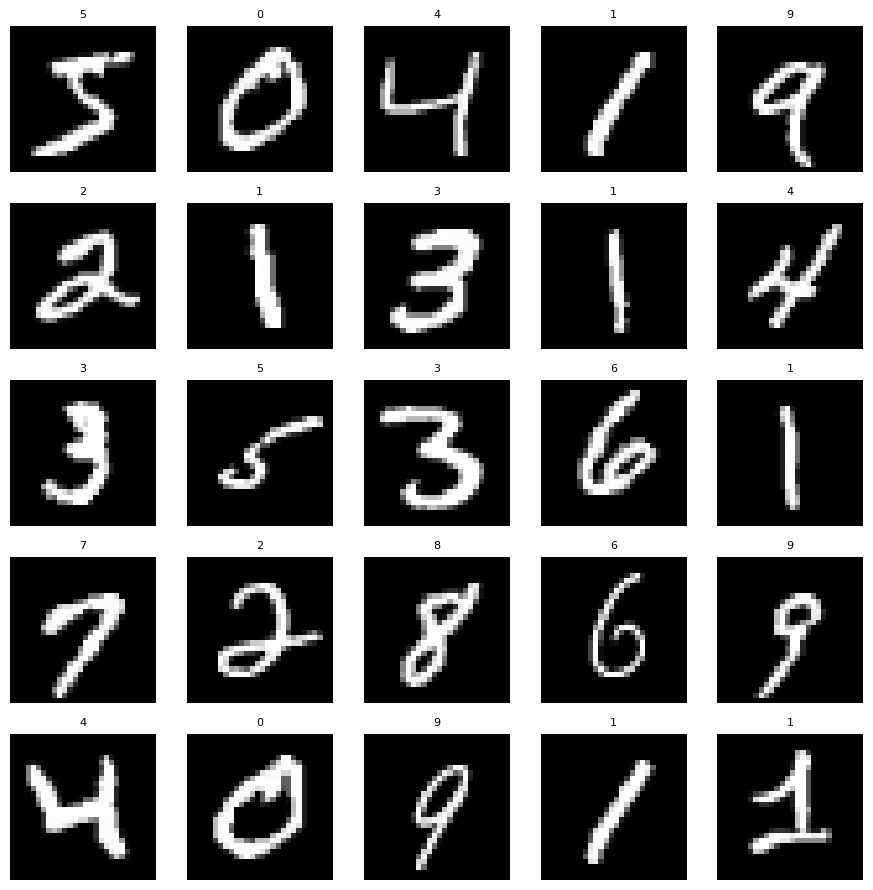

In [5]:
#Hacemos una cuadrícula con varias imágenes
plt.figure(figsize=(9, 9))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
    plt.title(str(y_train[i]), fontsize=8)
plt.tight_layout()
plt.show()

In [6]:
#Normalización pixeles
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

5. Construcción del modelo

In [7]:
#Construcción del modelo
modelo = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

6. Compilación del modelo

In [8]:
#Configuramos el entrenamiento
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

7. Entrenar al modelo

In [9]:
#Entrenamiento del modelo
historial = modelo.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8668 - loss: 0.4657 - val_accuracy: 0.9638 - val_loss: 0.1310
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9618 - loss: 0.1339 - val_accuracy: 0.9730 - val_loss: 0.0991
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0844 - val_accuracy: 0.9753 - val_loss: 0.0869
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0629 - val_accuracy: 0.9752 - val_loss: 0.0844
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0453 - val_accuracy: 0.9745 - val_loss: 0.0898
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0370 - val_accuracy: 0.9803 - val_loss: 0.0714
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9922 - loss: 0.0285 - val_accuracy: 0.9788 - val_loss: 0.0744
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9930 - loss: 0.0238 - 

8. Evaluar exactitud

In [10]:
#Evaluamos al modelo
loss, acc = modelo.evaluate(x_test, y_test, verbose=0)
print(f"\nPrecisión final en el conjunto de prueba: {acc * 100:.2f}%")


Precisión final en el conjunto de prueba: 98.08%


9. Hacemos predicciones

In [11]:
#Predicciones del modelo
predicciones = modelo.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


10. Predicciones

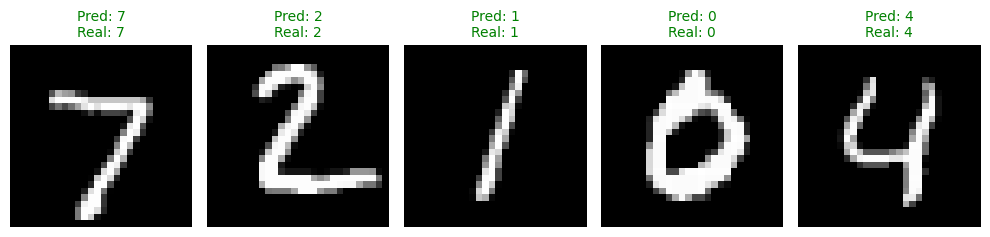

In [12]:
#Observación de algunas predicciones
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.axis("off")

    pred = np.argmax(predicciones[i])
    real = y_test[i]

    color = "green" if pred == real else "red"
    plt.title(f"Pred: {pred}\nReal: {real}", color=color, fontsize=10)

plt.tight_layout()
plt.show()